<a href="https://colab.research.google.com/github/ProgrammerGnome/ANN-modeling/blob/main/Beadand%C3%B3_feladat!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Beadandó feladat!

Deep Learning 2003 beadandó feladat!

Készítsen az alábbiakban letölthető fájlok segítségével egy a röntgen felvételeket értékelő bináris osztályozót. A felvételeken egészséges és beteg emberekhez tartozó röntgen képek találhatóak.
A feladatot konvolúciós neurális hálózat segítségével valósítsa meg!
Használjon korai leállítást, értékelje a modellt annak a pontosságával!
Rajzolja ki a költségfügvény alakaulását (Loss) és szövegesen értékelje ki!
Az elkészült modellt mentse el.
A test adatokon értékelje a modelljét!
A legjobb eredményt folyamatosan megosztom a Teamsben.

Beküldési határidő: 2023.december 22.

In [7]:
!gdown 1FfgdLCOpDlJZLp0MGohTh1sf4LgHICrN

Downloading...
From: https://drive.google.com/uc?id=1FfgdLCOpDlJZLp0MGohTh1sf4LgHICrN
To: /content/DL_beadandó.zip
100% 412M/412M [00:02<00:00, 148MB/s]


In [8]:
!unzip DL_beadandó.zip -d XRAY

Archive:  DL_beadandó.zip
replace XRAY/test/NORMAL/IM-0001-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: XRAY/test/NORMAL/IM-0001-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0003-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0005-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0006-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0007-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0009-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0010-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0011-0001-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0011-0001-0002.jpeg  
  inflating: XRAY/test/NORMAL/IM-0011-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0013-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0015-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0016-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0017-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0019-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0021-0001.jpeg  
  inflating: XRAY/test/NORMAL/IM-0022-0001.jpeg  
  inflating: XRAY/test/NORMAL/

Beállítjuk a képek és a batch méretét

In [9]:
IMAGE_SHAPE = (200, 200)
BATCH_SIZE = 5

In [10]:
train_dir = "XRAY/train/"
test_dir = "XRAY/test/"

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1 / 255.)
test_datagen = ImageDataGenerator(rescale=1 / 255.)

In [12]:
print("Training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")
print("Testing images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             class_mode="categorical")

Training images:
Found 1000 images belonging to 2 classes.
Testing images:
Found 624 images belonging to 2 classes.


In [27]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Conv2D(256, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(momentum=0.9),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(2048, activation='relu'),
    layers.Dropout(0.9),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 256)     7168      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 99, 99, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 48, 48, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                      

In [30]:
# initial_learning_rate = 0.1
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=1000, decay_rate=0.9, staircase=True)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.AdamW(learning_rate=0.00001),#lr_schedule),
              metrics=['accuracy'])

In [31]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1 / 255.,
    rotation_range=40,
    shear_range=0.3,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Bővített tanító adathalmaz generálása
augmented_train_data = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=IMAGE_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True
)

# Tanító adathalmazok összekapcsolása
combined_train_data = tf.data.Dataset.from_generator(
    lambda: train_data,
    output_signature=(
        tf.TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 2), dtype=tf.float32)
    )
).concatenate(
    tf.data.Dataset.from_generator(
        lambda: augmented_train_data,
        output_signature=(
            tf.TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32),
            tf.TensorSpec(shape=(None, 2), dtype=tf.float32)
        )
    )
)

Found 1000 images belonging to 2 classes.


In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

fake_model_checkpoint = ModelCheckpoint("PheoModel.h5",
                                        save_best_only=True,
                                        monitor='val_accuracy',
                                        mode='max',
                                        verbose=1)

In [33]:
model.fit(combined_train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps=len(test_data),
          callbacks=fake_model_checkpoint)
model.save("PheoModel.h5")

Epoch 1/5
200/200 [==============================] - ETA: 0s - loss: 0.9079 - accuracy: 0.6260
Epoch 1: val_accuracy improved from -inf to 0.75321, saving model to PheoModel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 31s 142ms/step - loss: 0.9079 - accuracy: 0.6260 - val_loss: 0.4632 - val_accuracy: 0.7532
Epoch 2/5
200/200 [==============================] - ETA: 0s - loss: 0.6048 - accuracy: 0.7240
Epoch 2: val_accuracy improved from 0.75321 to 0.85096, saving model to PheoModel.h5
200/200 [==============================] - 27s 134ms/step - loss: 0.6048 - accuracy: 0.7240 - val_loss: 0.3485 - val_accuracy: 0.8510
Epoch 3/5
200/200 [==============================] - ETA: 0s - loss: 0.4517 - accuracy: 0.7980
Epoch 3: val_accuracy did not improve from 0.85096
200/200 [==============================] - 21s 104ms/step - loss: 0.4517 - accuracy: 0.7980 - val_loss: 0.3387 - val_accuracy: 0.8446
Epoch 4/5
200/200 [==============================] - ETA: 0s - loss: 0.3495 - accuracy: 0.8470
Epoch 4: val_accuracy did not improve from 0.85096
200/200 [==============================] - 23s 113ms/step - loss: 0.3495 - accuracy: 0.8470 - val_loss: 0.4228 - val_accuracy:

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Korai leállítás és modell mentés callback-ek inicializálása
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=3,
                               restore_best_weights=True,
                               verbose=1)
model_checkpoint = ModelCheckpoint("PheoModel.h5",
                                   save_best_only=True,
                                   monitor='val_accuracy',
                                   mode='max',
                                   verbose=1)

In [35]:
from tensorflow.keras.models import load_model
loaded_model = load_model("PheoModel.h5")

In [36]:
history = loaded_model.fit(combined_train_data,
                           epochs=15,
                           steps_per_epoch=len(train_data),
                           validation_data=test_data,
                           validation_steps=len(test_data),
                           callbacks=[early_stopping, model_checkpoint])

Epoch 1/15
200/200 [==============================] - ETA: 0s - loss: 0.2166 - accuracy: 0.9110
Epoch 1: val_accuracy improved from -inf to 0.85897, saving model to PheoModel.h5
200/200 [==============================] - 31s 144ms/step - loss: 0.2166 - accuracy: 0.9110 - val_loss: 0.3132 - val_accuracy: 0.8590
Epoch 2/15
200/200 [==============================] - ETA: 0s - loss: 0.1807 - accuracy: 0.9230
Epoch 2: val_accuracy improved from 0.85897 to 0.88622, saving model to PheoModel.h5
200/200 [==============================] - 28s 138ms/step - loss: 0.1807 - accuracy: 0.9230 - val_loss: 0.3059 - val_accuracy: 0.8862
Epoch 3/15
200/200 [==============================] - ETA: 0s - loss: 0.2125 - accuracy: 0.9270
Epoch 3: val_accuracy did not improve from 0.88622
200/200 [==============================] - 21s 106ms/step - loss: 0.2125 - accuracy: 0.9270 - val_loss: 0.3164 - val_accuracy: 0.8734
Epoch 4/15
200/200 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.9

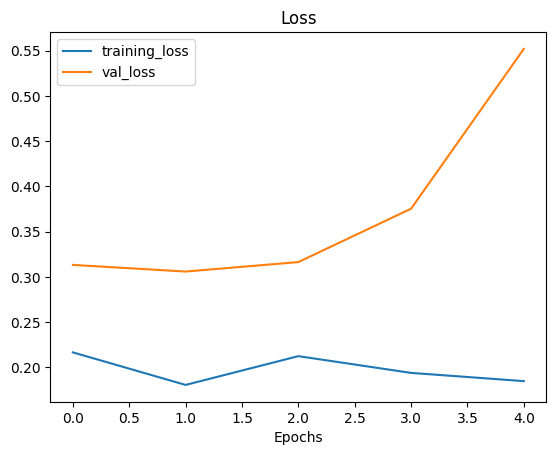

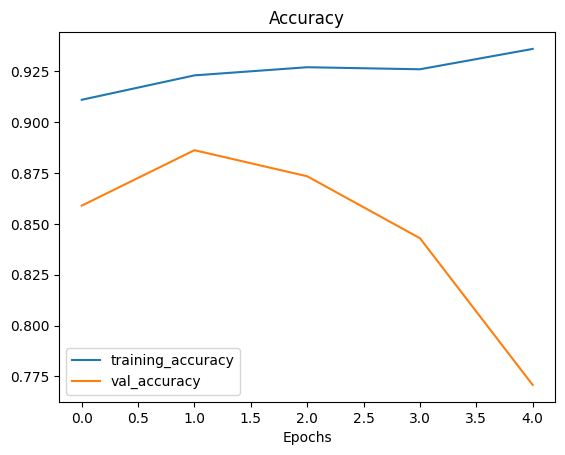

In [38]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()


plot_loss_curves(history)

In [42]:
model2 = tf.keras.models.load_model("PheoModel.h5")
print("Az elkészült model teszthalmazon mért pontossága:", round(max(history.history['val_accuracy'])*100, 4), "%")

Az elkészült model teszthalmazon mért pontossága: 88.6218 %
